# Importação da bibliotecas

In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statstests.process import stepwise
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score,roc_curve, auc,roc_auc_score,\
    balanced_accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
pd.set_option("display.max_rows", None)


# Leitura do DataSet e visualização dos dados

In [93]:
#'/kaggle/input/student-depression-dataset/Student Depression Dataset.csv'
dataset_path = 'Student Depression Dataset.csv'
df = pd.read_csv(dataset_path)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Verificando o tipo de variaveis

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Removendo valores nulos

In [95]:
display(df.isnull().sum())
display(df.isna().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [96]:
df.dropna(inplace=True)

## Renomeando as colunas

In [97]:
df.rename(columns={
    'Academic Pressure': 'AP',
    'Work Pressure':'WP',
    'Study Satisfaction':'SS',
    'Job Satisfaction':'JS',
    'Sleep Duration':'SD',
    'Dietary Habits':'DH',
    'Have you ever had suicidal thoughts ?':'ST',
    'Work/Study Hours':'WSH',
    'Financial Stress':'FS',
    'Family History of Mental Illness':'FHMI'
},inplace=True)

## Removendo a coluna ID

In [98]:
df.drop(columns='id',inplace=True)

# Verificando cada variavel do DataSet

## Analisando as variaveis quantitativas

### Função para verificar outliers

In [99]:
def check_outliers(df):
    Q1 = np.percentile(df,25) # Obtendo o valor do 25 percentil
    Q3 = np.percentile(df,75) # Obtendo o valor do 75 percentil

    IQR = Q3 - Q1 # Calculando o valor do intervalo interquartil
    limit_lower = Q1 - 1.5 * IQR
    limit_upper = Q3 + 1.5 * IQR

    outliers = df[( df < limit_lower )|( df > limit_upper )]
    display(outliers.sort_values().values)
    sns.boxplot(df)
    return limit_lower, limit_upper

### Age

In [100]:
df['Age'].describe()

count    27898.000000
mean        25.822174
std          4.905651
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

In [101]:
df['Age'].value_counts().sort_index()

Age
18.0    1587
19.0    1560
20.0    2236
21.0    1726
22.0    1160
23.0    1645
24.0    2258
25.0    1784
26.0    1155
27.0    1462
28.0    2133
29.0    1949
30.0    1145
31.0    1427
32.0    1261
33.0    1893
34.0    1468
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: count, dtype: int64

array([44., 46., 46., 48., 48., 48., 49., 51., 54., 56., 58., 59.])

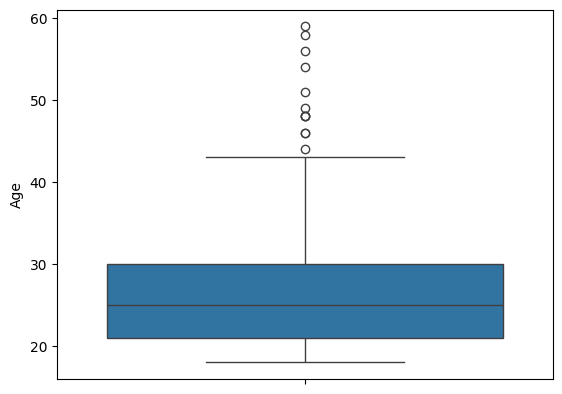

In [102]:
limit_lower, limit_upper = check_outliers(df['Age'])

### Remoção dos outliers da variavel Age

array([], dtype=float64)

(np.float64(7.5), np.float64(43.5))

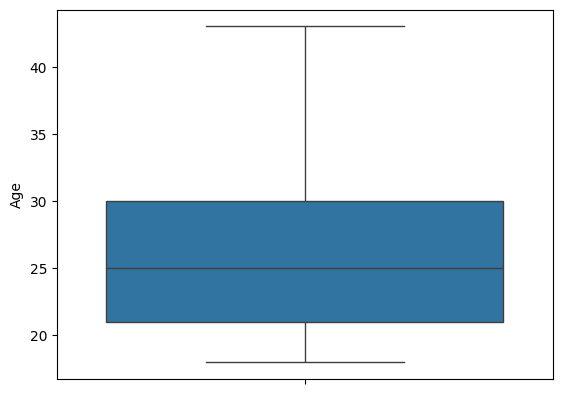

In [103]:
df.query('Age >= @limit_lower and Age <= @limit_upper',inplace=True)
check_outliers(df['Age'])

## CGPA

In [104]:
df['CGPA'].describe()

count    27886.00000
mean         7.65621
std          1.47081
min          0.00000
25%          6.29000
50%          7.77000
75%          8.92000
max         10.00000
Name: CGPA, dtype: float64

In [105]:
df['CGPA'].value_counts()

CGPA
8.0400     821
9.9600     425
5.7400     410
8.9500     371
9.2100     343
7.2500     339
7.0900     320
7.8800     318
9.4400     317
8.9100     276
9.9300     274
7.7700     269
8.7400     267
7.1000     252
9.7200     250
5.6400     246
9.3900     243
6.9900     242
6.3700     238
7.5300     234
6.7800     232
9.2400     224
8.5900     220
5.8500     216
6.1600     215
5.1600     209
8.5800     208
7.9400     207
5.8800     207
8.1700     198
5.3200     196
8.2400     194
5.5600     178
9.5600     176
8.1400     174
6.1000     168
5.1200     167
8.9000     164
5.5700     164
5.3700     159
9.7100     157
6.0000     154
6.8900     153
9.4100     153
9.8900     151
6.8300     150
9.6300     150
6.2500     147
5.8200     144
7.0400     143
6.7500     143
8.7300     142
8.9600     142
9.6000     141
9.8600     141
9.7900     141
9.9700     139
5.7600     139
9.6700     136
7.4700     135
8.5400     135
8.6200     135
9.9500     133
9.7400     129
8.7000     128
7.2200     127
6.210

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

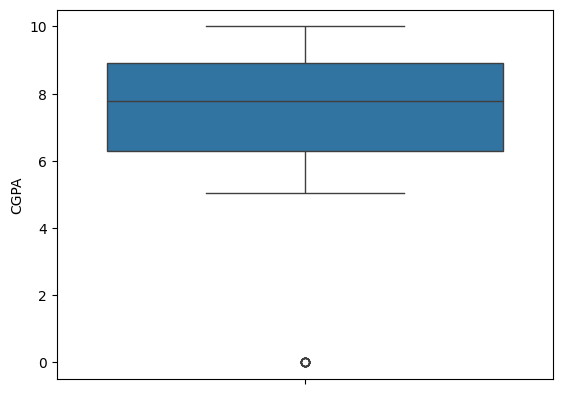

In [106]:
limit_lower, limit_upper = check_outliers(df['CGPA'])

In [107]:
filtred_cgpa = df['CGPA'].value_counts()[lambda x: x > 9].index
display(filtred_cgpa)
df.query('CGPA in @filtred_cgpa',inplace=True)

Index([8.04, 9.96, 5.74, 8.95, 9.21, 7.25, 7.09, 7.88, 9.44, 8.91,
       ...
       9.12,  7.0, 5.03, 8.16, 6.19, 8.55, 7.79,  8.1, 5.06, 5.17],
      dtype='float64', name='CGPA', length=313)

array([], dtype=float64)

(np.float64(2.345), np.float64(12.865))

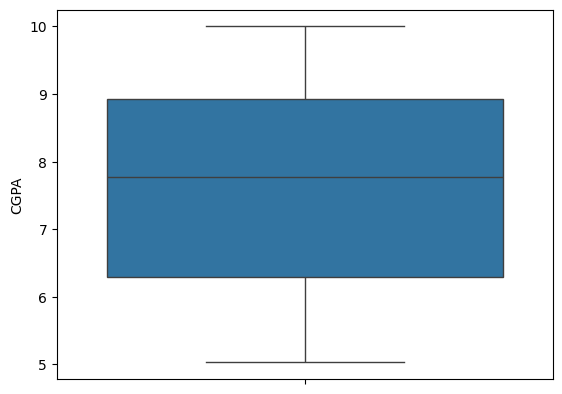

In [108]:
check_outliers(df['CGPA'])

# Variaveis Categoricas

In [109]:
def pie_plot(data, labels, title):
    plt.figure(figsize=(6,6))
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

## Gender

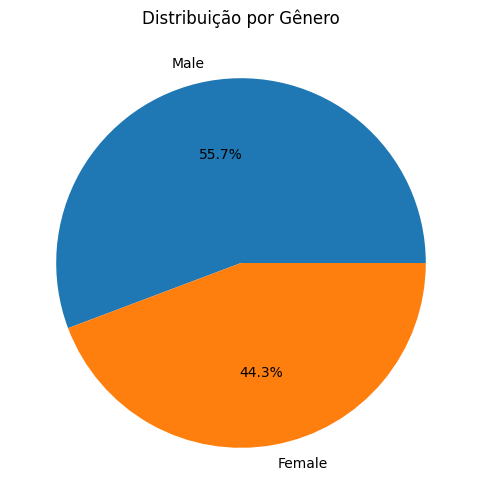

In [110]:
gender_counts = df['Gender'].value_counts()
pie_plot(data=gender_counts, labels=gender_counts.index, title='Distribuição por Gênero')

In [111]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype('int64')

## City

In [112]:
df['City'].value_counts()

City
Kalyan                1569
Srinagar              1368
Hyderabad             1338
Vasai-Virar           1286
Lucknow               1151
Thane                 1138
Ludhiana              1108
Agra                  1092
Surat                 1076
Kolkata               1065
Jaipur                1034
Patna                 1006
Visakhapatnam          968
Pune                   965
Ahmedabad              949
Bhopal                 929
Chennai                882
Meerut                 824
Rajkot                 813
Bangalore              767
Delhi                  766
Ghaziabad              738
Mumbai                 698
Vadodara               692
Varanasi               684
Nagpur                 649
Indore                 643
Kanpur                 608
Nashik                 544
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [113]:
filtered_cities = df['City'].value_counts()[lambda x: x > 2].index
display(filtered_cities)
df.query('City in @filtered_cities',inplace=True)
df['City'].value_counts()

Index(['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane',
       'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna',
       'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut',
       'Rajkot', 'Bangalore', 'Delhi', 'Ghaziabad', 'Mumbai', 'Vadodara',
       'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad'],
      dtype='object', name='City')

City
Kalyan           1569
Srinagar         1368
Hyderabad        1338
Vasai-Virar      1286
Lucknow          1151
Thane            1138
Ludhiana         1108
Agra             1092
Surat            1076
Kolkata          1065
Jaipur           1034
Patna            1006
Visakhapatnam     968
Pune              965
Ahmedabad         949
Bhopal            929
Chennai           882
Meerut            824
Rajkot            813
Bangalore         767
Delhi             766
Ghaziabad         738
Mumbai            698
Vadodara          692
Varanasi          684
Nagpur            649
Indore            643
Kanpur            608
Nashik            544
Faridabad         461
Name: count, dtype: int64

## Profession

In [114]:
df['Profession'].value_counts()

Profession
Student                   27780
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [115]:
df.drop(columns=['Profession'],axis=1,inplace=True)

## Academic Pressure

In [116]:
df['AP'].value_counts().sort_index()

AP
0.0       3
1.0    4781
2.0    4161
3.0    7439
4.0    5143
5.0    6284
Name: count, dtype: int64

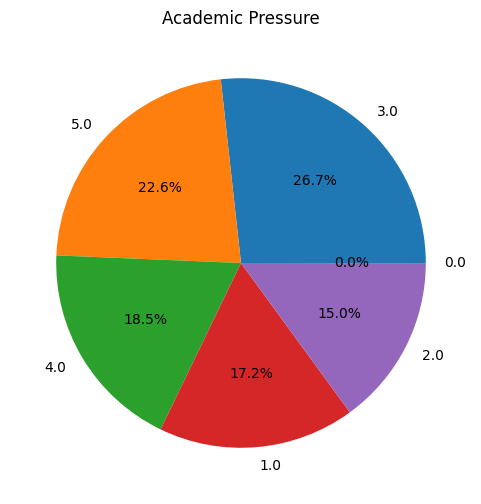

In [117]:
ap_counts = df['AP'].value_counts()
pie_plot(data=ap_counts, labels=ap_counts.index, title='Academic Pressure')


In [118]:
df.query('AP > 0.0 ', inplace=True)

## Work Pressure 

In [119]:
df['WP'].value_counts().sort_index()

WP
0.0    27808
Name: count, dtype: int64

In [120]:
df.drop(columns=['WP'],inplace=True)

## Study Satisfaction

In [121]:
df['SS'].value_counts().sort_index()

SS
0.0       2
1.0    5430
2.0    5823
3.0    5803
4.0    6342
5.0    4408
Name: count, dtype: int64

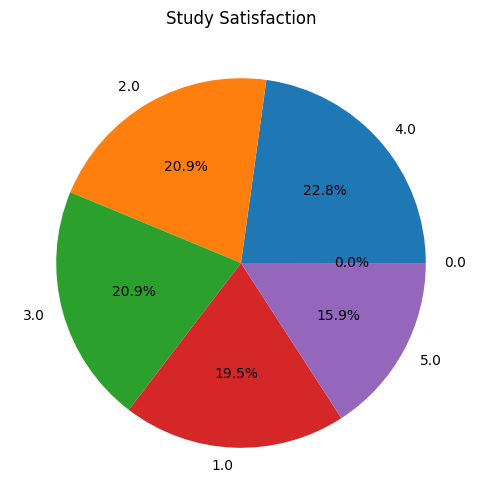

In [122]:
ss_counts = df['SS'].value_counts()
pie_plot(data=ss_counts, labels=ss_counts.index, title='Study Satisfaction')

In [123]:
df.query('SS > 0.0 ', inplace=True)

## Job Satisfaction 

In [124]:
df['JS'].value_counts().sort_index()

JS
0.0    27804
2.0        1
3.0        1
Name: count, dtype: int64

In [125]:
df.drop(columns=['JS'],inplace=True)

## Sleep Duration

In [126]:
df['SD'].value_counts().sort_index()

SD
5-6 hours            6160
7-8 hours            7317
Less than 5 hours    8282
More than 8 hours    6029
Others                 18
Name: count, dtype: int64

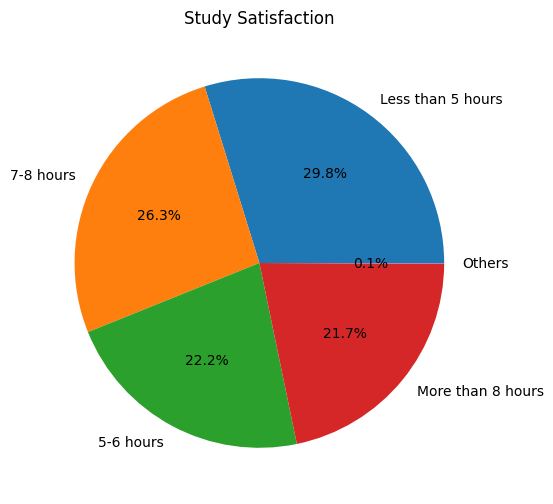

In [127]:
sd_counts = df['SD'].value_counts()
pie_plot(data=sd_counts, labels=sd_counts.index, title='Study Satisfaction')

In [128]:
df.query('SD != "Others" ', inplace=True)

In [129]:
mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

df['SD'] = df['SD'].map(mapping)

## Dietary Habits

In [130]:
df['DH'].value_counts().sort_index()

DH
Healthy       7622
Moderate      9886
Others          12
Unhealthy    10268
Name: count, dtype: int64

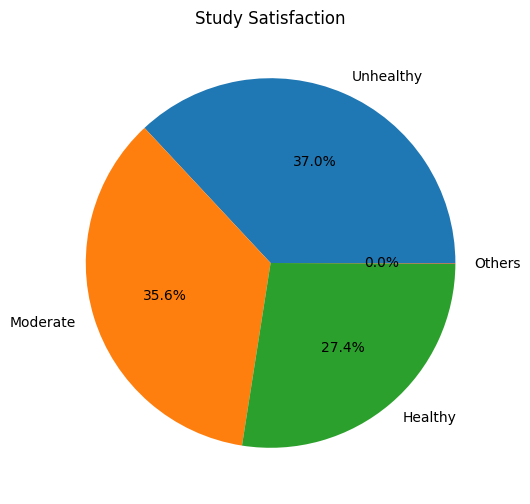

In [131]:
dh_counts = df['DH'].value_counts()
pie_plot(data=dh_counts, labels=dh_counts.index, title='Study Satisfaction')

In [132]:
df.query('DH != "Others" ', inplace=True)

In [133]:
mapping = {
    'Healthy': 0,
    'Moderate': 1,
    'Unhealthy': 3
}

df['DH'] = df['DH'].map(mapping)

## Degree

In [134]:
df['Degree'].value_counts().sort_index(ascending=False)

Degree
PhD          518
Others        35
MSc         1187
MHM          190
ME           185
MD           570
MCA         1036
MBBS         691
MBA          560
MA           544
M.Tech      1018
M.Pharm      580
M.Ed         816
M.Com        734
LLM          481
LLB          666
Class 12    6051
BSc          884
BHM          924
BE           606
BCA         1426
BBA          693
BA           594
B.Tech      1149
B.Pharm      808
B.Ed        1858
B.Com       1498
B.Arch      1474
Name: count, dtype: int64

In [135]:
def categorize_education(degree):
    if degree == "Class 12":
        return 0 # Secondary Education
    elif degree in ["PhD", "Others", "MSc", "MHM", "ME", "MD", "MCA", "MBBS", "MBA", "MA", 
                   "M.Tech", "M.Pharm", "M.Ed", "M.Com", "LLM"]:
        return 1 # Postgraduate Degree
    elif degree in ["LLB", "BSc", "BHM", "BE", "BCA", "BBA", "BA", "B.Tech", 
                   "B.Pharm", "B.Ed", "B.Com", "B.Arch"]:
        return 2 # Undergraduate Degree

df["Degree"] = df["Degree"].apply(categorize_education).astype('category')

In [136]:
df["Degree"].value_counts()

Degree
2    12580
1     9145
0     6051
Name: count, dtype: int64

## Have you ever had suicidal thoughts ?

In [137]:
df['ST'].value_counts().sort_index()

ST
No     10199
Yes    17577
Name: count, dtype: int64

In [138]:
mapping = {
    'No':0,
    'Yes':1
}

df['ST'] = df['ST'].map(mapping)

## Work/Study Hours

In [139]:
df['WSH'].value_counts().sort_index()


WSH
0.0     1691
1.0     1143
2.0     1580
3.0     1464
4.0     1604
5.0     1290
6.0     2236
7.0     1990
8.0     2501
9.0     2018
10.0    4223
11.0    2882
12.0    3154
Name: count, dtype: int64

## Financial Stress

In [140]:
df['FS'].value_counts().sort_index()

FS
1.0    5101
2.0    5040
3.0    5196
4.0    5758
5.0    6681
Name: count, dtype: int64

## Family History of Mental Illness

In [141]:
df['FHMI'].value_counts().sort_index()

FHMI
No     14327
Yes    13449
Name: count, dtype: int64

In [142]:
df['FHMI']= df['FHMI'].map({'No':0,'Yes':1}).astype('int64')

## Depression

In [143]:
df['Depression'].value_counts().sort_index()

Depression
0    11503
1    16273
Name: count, dtype: int64

# Implementação do Algoritimos

## Realizando processo de dummie para a variavel cidade

In [144]:
df_dummies = pd.get_dummies(df, columns=['City'], dtype=int, drop_first=True)

In [145]:
df_dummies.shape

(27776, 42)

## Modelo Logisitico

### Gerando formula para o modelo

In [146]:
df_dummies.columns = df_dummies.columns.str.replace('-', '_', regex=True)

list_colums_dummies = list(df_dummies.drop(columns=['Depression']).columns)
formula_dummies_model = ' + '.join(list_colums_dummies)
formula_dummies_model = 'Depression ~ ' + formula_dummies_model
formula_dummies_model

'Depression ~ Gender + Age + AP + CGPA + SS + SD + DH + Degree + ST + WSH + FS + FHMI + City_Ahmedabad + City_Bangalore + City_Bhopal + City_Chennai + City_Delhi + City_Faridabad + City_Ghaziabad + City_Hyderabad + City_Indore + City_Jaipur + City_Kalyan + City_Kanpur + City_Kolkata + City_Lucknow + City_Ludhiana + City_Meerut + City_Mumbai + City_Nagpur + City_Nashik + City_Patna + City_Pune + City_Rajkot + City_Srinagar + City_Surat + City_Thane + City_Vadodara + City_Varanasi + City_Vasai_Virar + City_Visakhapatnam'

### Realizando o treino do modelo:

In [147]:
model = sm.Logit.from_formula(formula_dummies_model,df_dummies).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.347690
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27776
Model:                          Logit   Df Residuals:                    27733
Method:                           MLE   Df Model:                           42
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.4874
Time:                        21:03:58   Log-Likelihood:                -9657.4
converged:                       True   LL-Null:                       -18841.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.4763      0.195    -17.793      0.000      -3.859      -3.093
Degree[T.1]            0.1770      0.064      2.760      0.006       0.051       0.303
Degree[T.2]            0.1630      0.059      2.748      0.006       0.047       0.279
Gender                -0.0058      0.037     -0.156      0.876      -0.078       0.067
Age                   -0.1181      0.005    -24.280      0.000      -0.128      -0.109
AP                     0.8402      0.015     55.994      0.000       0.811       0.870
CGPA                   0.0554      0.013      4.418      0.000       0.031       0.080
SS                    -0.2434      0.014    -17.821      0.000      -0.270      -0.217
SD                    -0.1893      0.016    -11.560      0.000      -0.221      -0.157
DH                     0.3552      0.015     23.539      0.000       0.326       0.385
ST                     2.5229      0.039     64.156      0.000       2.446       2.600
WSH                    0.1177      0.005     23.571      0.000       0.108       0.127
FS                     0.5534      0.013     41.316      0.000       0.527       0.580
FHMI                   0.2495      0.037      6.818      0.000       0.178       0.321
City_Ahmedabad         0.5683      0.134      4.237      0.000       0.305       0.831
City_Bangalore         0.3404      0.142      2.397      0.017       0.062       0.619
City_Bhopal            0.4240      0.132      3.202      0.001       0.164       0.684
City_Chennai           0.1770      0.135      1.306      0.191      -0.089       0.442
City_Delhi             0.3443      0.142      2.430      0.015       0.067       0.622
City_Faridabad         0.4151      0.165      2.510      0.012       0.091       0.739
City_Ghaziabad         0.2828      0.145      1.957      0.050      -0.000       0.566
City_Hyderabad         0.5418      0.122      4.428      0.000       0.302       0.782
City_Indore            0.2969      0.148      2.011      0.044       0.008       0.586
City_Jaipur            0.0198      0.129      0.154      0.878      -0.233       0.272
City_Kalyan            0.3457      0.119      2.915      0.004       0.113       0.578
City_Kanpur            0.2826      0.150      1.881      0.060      -0.012       0.577
City_Kolkata           0.4711      0.132      3.572      0.000       0.213       0.730
City_Lucknow           0.1757      0.127      1.385      0.166      -0.073       0.424
City_Ludhiana          0.3200      0.128      2.501      0.012       0.069       0.571
City_Meerut            0.4453      0.139      3.202      0.001       0.173       0.718
City_Mumbai           -0.0237      0.145     -0.163      0.871      -0.308       0.261
City_Nagpur           -0.0683      0.146     -0.467      0.641      -0.355       0.219
City_Nashik            0.3355      0.155      2.163      0.031       0.032       0.640
City_Patna             0.4776      0.130      3.667      0.000       0.222       0.733
City_Pune             

### Executando o processo de stepwise para remoção de variaveis.

In [148]:
stepwise_model = stepwise(model,pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Depression ~ Q('Degree[T.1]') + Q('Degree[T.2]') + Q('Gender') + Q('Age') + Q('AP') + Q('CGPA') + Q('SS') + Q('SD') + Q('DH') + Q('ST') + Q('WSH') + Q('FS') + Q('FHMI') + Q('City_Ahmedabad') + Q('City_Bangalore') + Q('City_Bhopal') + Q('City_Chennai') + Q('City_Delhi') + Q('City_Faridabad') + Q('City_Ghaziabad') + Q('City_Hyderabad') + Q('City_Indore') + Q('City_Jaipur') + Q('City_Kalyan') + Q('City_Kanpur') + Q('City_Kolkata') + Q('City_Lucknow') + Q('City_Ludhiana') + Q('City_Meerut') + Q('City_Mumbai') + Q('City_Nagpur') + Q('City_Nashik') + Q('City_Patna') + Q('City_Pune') + Q('City_Rajkot') + Q('City_Srinagar') + Q('City_Surat') + Q('City_Thane') + Q('City_Vadodara') + Q('City_Varanasi') + Q('City_Vasai_Virar') + Q('City_Visakhapatnam')
Optimization terminated successfully.
         Current function value: 0.347690
         Iterations 7

 Discarding atribute "Q('City_Jaipur')" with p-value equal to 0.8775957371840477 

Estimating mod

In [149]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27776
Model:                          Logit   Df Residuals:                    27757
Method:                           MLE   Df Model:                           18
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.4864
Time:                        21:04:03   Log-Likelihood:                -9676.8
converged:                       True   LL-Null:                       -18841.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.2463      0.174    -18.678      0.000      -3.587      -2.906
Q('Degree[T.1]')        0.1698      0.064      2.669      0.008       0.045       0.295
Q('Degree[T.2]')        0.1519      0.059      2.584      0.010       0.037       0.267
Q('Age')               -0.1177      0.005    -24.309      0.000      -0.127      -0.108
Q('AP')                 0.8390      0.015     56.183      0.000       0.810       0.868
Q('CGPA')               0.0561      0.012      4.497      0.000       0.032       0.081
Q('SS')                -0.2435      0.014    -17.876      0.000      -0.270      -0.217
Q('SD')                -0.1900      0.016    -11.626      0.000      -0.222      -0.158
Q('DH')                 0.3535      0.015     23.561      0.000       0.324       0.383
Q('ST')                 2.5184      0.039     64.242      0.000       2.442       2.595
Q('WSH')                0.1173      0.005     23.546      0.000       0.108       0.127
Q('FS')                 0.5526      0.013     41.341      0.000       0.526       0.579
Q('FHMI')               0.2477      0.037      6.783      0.000       0.176       0.319
Q('City_Ahmedabad')     0.3414      0.102      3.331      0.001       0.141       0.542
Q('City_Bhopal')        0.1968      0.100      1.961      0.050    9.79e-05       0.393
Q('City_Hyderabad')     0.3149      0.087      3.636      0.000       0.145       0.485
Q('City_Kolkata')       0.2435      0.099      2.448      0.014       0.049       0.438
Q('City_Meerut')        0.2184      0.109      2.007      0.045       0.005       0.432
Q('City_Patna')         0.2507      0.097      2.577      0.010       0.060       0.441
=======================================================================================
"""

### Analisando os resultados do modelo

In [150]:
def confusion_matrix_plot(predicts, observated, cutoff):
    
    values = predicts.values
    
    binary_prediction = []
        
    for item in values:
        if item < cutoff:
            binary_prediction.append(0)
        else:
            binary_prediction.append(1)
           
    cm = confusion_matrix(binary_prediction, observated)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitivity = recall_score(observated, binary_prediction, pos_label=1)
    specificity = recall_score(observated, binary_prediction, pos_label=0)
    accuracy = accuracy_score(observated, binary_prediction)

    indicators = pd.DataFrame({'Sensitividade':[sensitivity],
                                'Especificidade':[specificity],
                                'Acurácia':[accuracy]})
    return indicators

In [151]:
df_dummies['phat'] = stepwise_model.predict()

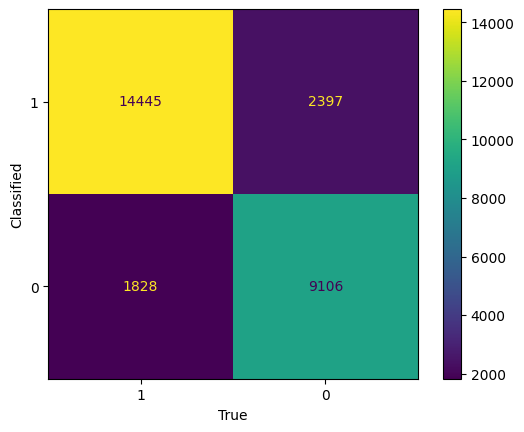

,Sensitividade,Especificidade,Acurácia
0,0.887667,0.79162,0.84789


In [152]:
confusion_matrix_plot(observated=df_dummies['Depression'],
                predicts=df_dummies['phat'],
                cutoff=0.5)

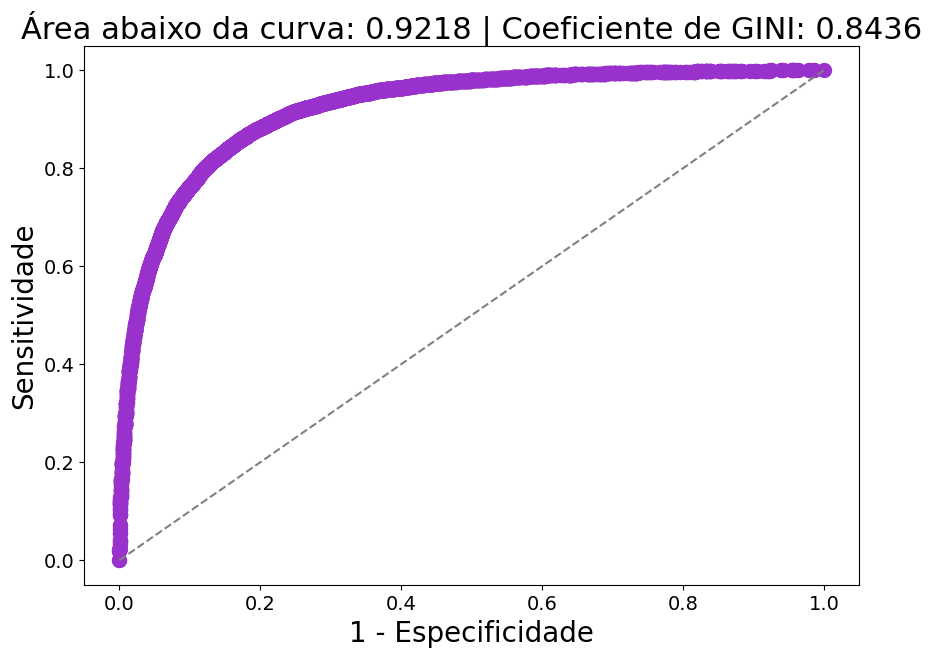

In [153]:
fpr, tpr, thresholds =roc_curve(df_dummies['Depression'],
                                df_dummies['phat'])
roc_auc = auc(fpr, tpr)

gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

## Árvore de Decisão

### Separando as variasveis preditoras da target

In [154]:
X = df_dummies.drop(columns=['Depression','phat'])
y = df_dummies['Depression']

### Realizando a divisão do dataframe em teste e treino

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [156]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(20832, 41)

(20832,)

(6944, 41)

(6944,)

In [157]:
clf = DecisionTreeClassifier(criterion='gini', 
                                max_depth = 3, 
                                random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [158]:
pred = clf.predict(X_test)

y_prob = clf.predict_proba(X_test)[:, -1]

ac = accuracy_score(y_test, pred)
bac = balanced_accuracy_score(y_test, pred)
print(f'accuracy_score: {ac:.1%}')
print(f'balanced_accuracy_score: {bac:.1%}')

# Calculando AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_score:.2%}")
print(f"GINI: {(2*auc_score-1):.2%}")


print('\n', classification_report(y_test, pred))



accuracy_score: 82.3%
balanced_accuracy_score: 80.9%
AUC-ROC: 87.34%
GINI: 74.67%

               precision    recall  f1-score   support

           0       0.83      0.72      0.77      2896
           1       0.82      0.90      0.85      4048

    accuracy                           0.82      6944
   macro avg       0.82      0.81      0.81      6944
weighted avg       0.82      0.82      0.82      6944



[Text(0.5, 0.875, 'x[8] <= 0.5\ngini = 0.485\nsamples = 20832\nvalue = [8607, 12225]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.355\nsamples = 7606\nvalue = [5849, 1757]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 3.5\ngini = 0.224\nsamples = 5522\nvalue = [4814, 708]'),
 Text(0.0625, 0.125, 'gini = 0.144\nsamples = 3874\nvalue = [3572, 302]'),
 Text(0.1875, 0.125, 'gini = 0.371\nsamples = 1648\nvalue = [1242, 406]'),
 Text(0.375, 0.375, 'x[10] <= 2.5\ngini = 0.5\nsamples = 2084\nvalue = [1035, 1049]'),
 Text(0.3125, 0.125, 'gini = 0.44\nsamples = 880\nvalue = [593, 287]'),
 Text(0.4375, 0.125, 'gini = 0.465\nsamples = 1204\nvalue = [442, 762]'),
 Text(0.75, 0.625, 'x[2] <= 2.5\ngini = 0.33\nsamples = 13226\nvalue = [2758, 10468]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[10] <= 2.5\ngini = 0.5\nsamples = 3110\nvalue = [1534, 1576]'),
 Text(0.5625, 0.125, 'gini = 0.409\nsamples = 1135\nvalue = [810, 325]'),
 Text(0.6875, 0.125, 'gini = 0.464\nsamples 

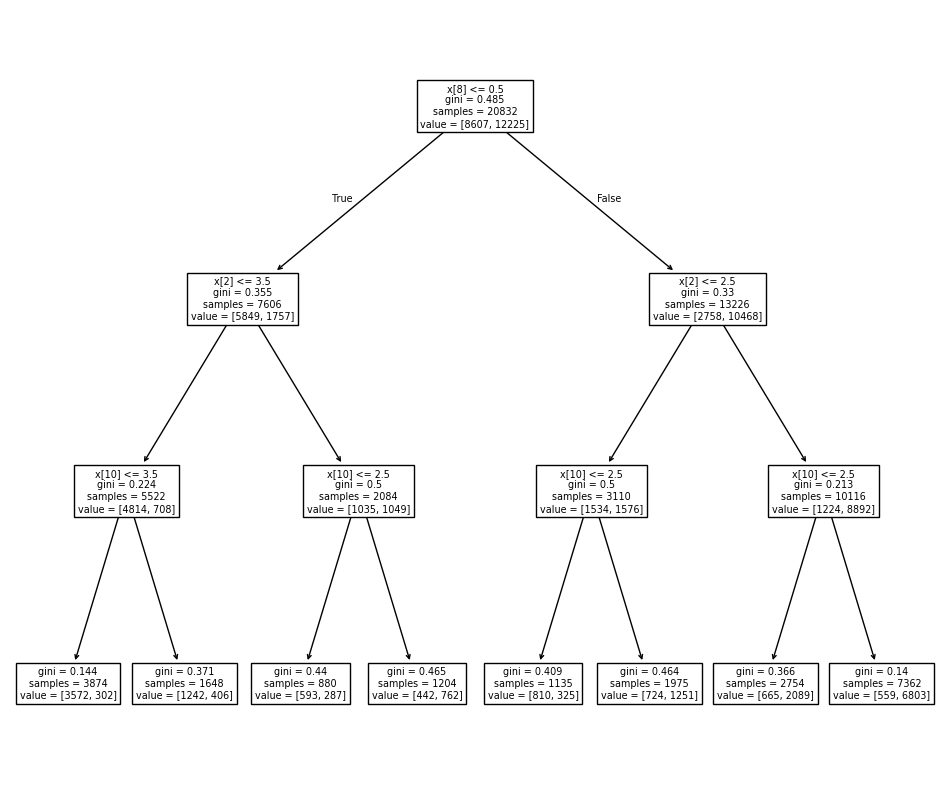

In [159]:
plt.figure(figsize=(12, 10))
plot_tree(clf)